In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from autofeat import FeatureSelector, AutoFeatRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Feature Selection

In [2]:
# generate some toy data
np.random.seed(15)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
x4 = np.random.randn(1000)
x5 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
X = np.vstack([x1, x2, x3, x4, x5, 1/(x2 - 1/x3), (x2 + np.log(x1))**3]).T
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X, columns=["x1", "x2", "x3", "x4", "x5", "eng6", "eng7"]), pd.DataFrame(target))
# should contain ["x1", "eng6", "eng7"]
print(new_X.columns)

/Users/franzi/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[featsel] Scaling data...done.
[featsel] Iteration   0;   0 selected features with residual: 64.262748
[featsel] Iteration   4;   3 selected features with residual: 0.000005  --> done.
[featsel] Iteration   0;   0 selected features with residual: 54.027093
[featsel] Iteration   5;   3 selected features with residual: 0.000005  --> done.
[featsel] Iteration   0;   0 selected features with residual: 56.530609
[featsel] Iteration   4;   3 selected features with residual: 0.000007  --> done.
[featsel] Iteration   0;   0 selected features with residual: 65.004308
[featsel] Iteration   4;   5 selected features with residual: 0.000010  --> done.
[featsel] Iteration   0;   0 selected features with residual: 67.484998
[featsel] Iteration   4;   5 selected features with residual: 0.000019  --> done.
[featsel] 4 features occurred in more than one featsel run.
[featsel] 3 new features selected.
Index(['x1', 'eng6', 'eng7'], dtype='object')


## AutoFeat

In [3]:
# generate some toy data
np.random.seed(15)
x1 = np.random.rand(1000)
x2 = np.random.randn(1000)
x3 = np.random.rand(1000)
target = 2 + 15*x1 + 3/(x2 - 1/x3) + 5*(x2 + np.log(x1))**3
target_noisy = target + 0.2*np.random.randn(1000)
X = np.vstack([x1, x2, x3]).T
df_org = pd.DataFrame(X, columns=["x1", "x2", "x3"])

### Effect of number of feature engineering steps

### AutoFeat with 0 feateng_steps
[AutoFeatRegression] The 0 step feature engineering process could generate up to 3 features.
[AutoFeatRegression] With 1000 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Warning: no features generated for max_steps < 1.
[featsel] Scaling data...done.
[featsel] Iteration   0;   0 selected features with residual: 64.262748
[featsel] Iteration   3;   2 selected features with residual: 64.975573  --> done.
[featsel] Iteration   0;   0 selected features with residual: 54.027093
[featsel] Iteration   3;   2 selected features with residual: 58.904837  --> done.
[featsel] Iteration   0;   0 selected features with residual: 56.530609
[featsel] Iteration   3;   3 selected features with residual: 58.223702  --> done.
[featsel] Iteration   0;   0 selected features with residual: 65.004308
[featsel] Iteration   3;   3 selected features with residual: 69.966273  --> done.
[featsel] Iteration   0;   0 selected features with residual:

[featsel] Iteration  40;  23 selected features with residual: 19.094236
[featsel] Iteration  41;   8 selected features with residual: 0.002308  --> done.
[featsel] 5 features occurred in more than one featsel run.
[featsel] 4 new features selected.
[AutoFeatRegression] Computing 4 new features.
[AutoFeatRegression]     4/    4 new features ...done.
[AutoFeatRegression] Training final regression model.
[AutoFeatRegression] Trained model: largest coefficients:
2.000000000003631
15.000000 * x1
5.000000 * (x2 + log(x1))**3
3.000000 * 1/(x2 - 1/x3)
[AutoFeatRegression] Final R^2: 1.0000
[AutoFeatRegression] Final dataframe with 7 feature columns (4 new).
[AutoFeatRegression] Computing 4 new features.
[AutoFeatRegression]     4/    4 new features ...done.
## Final R^2: 1.0000
[AutoFeatRegression] Computing 4 new features.
[AutoFeatRegression]     4/    4 new features ...done.
### AutoFeat with 4 feateng_steps
[AutoFeatRegression] The 4 step feature engineering process could generate up to 12

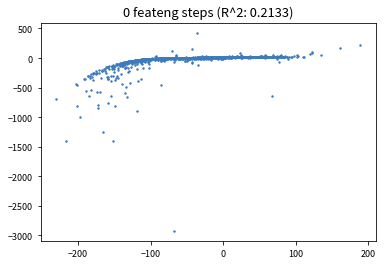

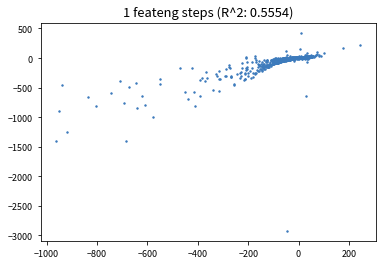

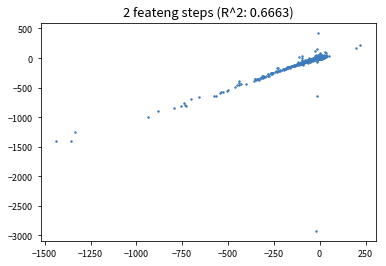

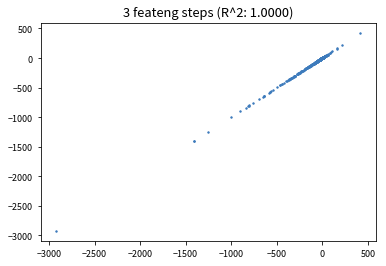

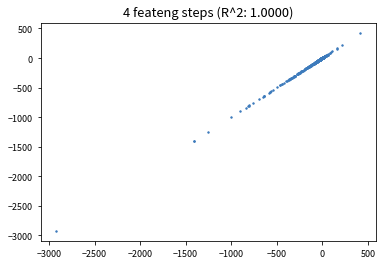

In [4]:
# autofeat with different number of feature engineering steps
# 3 are perfect
for steps in range(5):
    print("### AutoFeat with %i feateng_steps" % steps)
    afreg = AutoFeatRegression(verbose=1, feateng_steps=steps)
    df = afreg.fit_transform(df_org, target)
    r2 = afreg.score(df_org, target)
    print("## Final R^2: %.4f" % r2)
    plt.figure()
    plt.scatter(afreg.predict(df_org), target, s=2);
    plt.title("%i feateng steps (R^2: %.4f)" % (steps, r2))

### AutoFeat and noise

[AutoFeatRegression] The 3 step feature engineering process could generate up to 5271 features.
[AutoFeatRegression] With 1000 data points this new feature matrix would use about 0.02 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 17 transformed features from 3 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 749 feature combinations from 190 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 3487 transformed features from 749 original features - done.
[feateng] Generated a total of 3683 additional features
[featsel] Scaling data...done.
[featsel] Iteration   0;   0 selected features with residual: 64.260372
[featsel] Iteration   4;   2 selected features with residual: 33.265346  --> done.
[featsel] Iteration   0;   0 selected features with residual: 54.013145
[featsel] Iteration   8;   8 selected features with residual: 2.174065  --> done.
[featsel] It

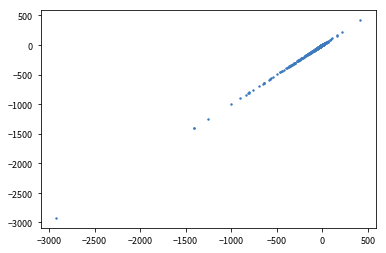

In [5]:
afreg = AutoFeatRegression(verbose=1)
# train on noisy data
df = afreg.fit_transform(df_org, target_noisy)
# test on real targets
print("Final R^2: %.4f" % afreg.score(df, target))
plt.figure()
plt.scatter(afreg.predict(df), target, s=2);